<a href="https://colab.research.google.com/github/mariusokoto/Optimization-Course-Marius-/blob/main/E8Opti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maximum Profit: 84
Selected Projects: [0, 1, 0, 1, 1, 1]


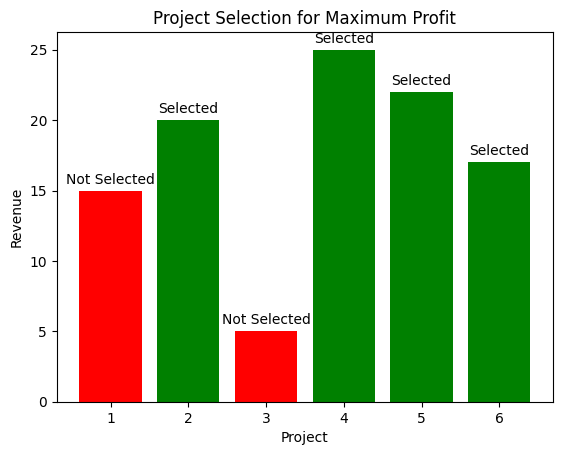

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def main():
    data = pd.read_csv('E8_opti.csv', sep=";")
    profits = data['Revenue'].tolist()
    weights = data['Days'].tolist()
    W = 200  # adjust the number of avaible researcher day

    # Branch and Bound algorithm
    def bound(node, n, W, profits, weights):
        if node.weight >= W:
            return 0
        profit_bound = node.profit
        j = node.level + 1
        totweight = node.weight

        while j < n and totweight + weights[j] <= W:
            totweight += weights[j]
            profit_bound += profits[j]
            j += 1

        if j < n:
            profit_bound += (W - totweight) * profits[j] / weights[j]

        return profit_bound

    class Node:
        def __init__(self, level, profit, weight, bound, include):
            self.level = level
            self.profit = profit
            self.weight = weight
            self.bound = bound
            self.include = include

    def branch_and_bound_knapsack(profits, weights, W):
        n = len(profits)
        queue = []

        u = Node(-1, 0, 0, 0.0, [])
        u.bound = bound(u, n, W, profits, weights)
        queue.append(u)

        max_profit = 0
        best_items = []

        while queue:
            u = queue.pop(0)

            if u.level == -1:
                v_level = 0
            else:
                v_level = u.level + 1

            if v_level < n:
                v_include = Node(v_level, u.profit + profits[v_level], u.weight + weights[v_level], 0.0, u.include + [1])
                v_include.bound = bound(v_include, n, W, profits, weights)

                if v_include.weight <= W and v_include.profit > max_profit:
                    max_profit = v_include.profit
                    best_items = v_include.include

                if v_include.bound > max_profit:
                    queue.append(v_include)

                v_exclude = Node(v_level, u.profit, u.weight, 0.0, u.include + [0])
                v_exclude.bound = bound(v_exclude, n, W, profits, weights)

                if v_exclude.bound > max_profit:
                    queue.append(v_exclude)

        return max_profit, best_items

    max_profit, best_items = branch_and_bound_knapsack(profits, weights, W)
    print(f"Maximum Profit: {max_profit}")
    print(f"Selected Projects: {best_items}")

    # Plotting the results
    projects = data['Project'].tolist()
    selected_projects = ['Selected' if x == 1 else 'Not Selected' for x in best_items]

    fig, ax = plt.subplots()

    bars = ax.bar(projects, profits, color=['green' if x == 1 else 'red' for x in best_items])

    ax.set_xlabel('Project')
    ax.set_ylabel('Revenue')
    ax.set_title('Project Selection for Maximum Profit')

    ax.bar_label(bars, labels=selected_projects, padding=3)
    plt.show()

if __name__ == "__main__":
    main()
